In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [3]:
#importing the Dataset
ideaspacedf= pd.read_csv("/content/ideaspiceemployeeturnoverdatset (2).csv")

In [4]:
ideaspacedf.head()

,EmployeId,Age,Gender,MaritalStatus,Turnover,Travelling,Vertical,Qualifications,EducationField,EmployeSatisfaction,...,RelationshipSatisfaction,Hours,StockOptionLevel,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
0,63,29,M,Divorced,No,Sometimes,Research & Development,1,Medical,3,...,4,80,1,2,3,3,2,2,2,2
1,723,23,M,Single,No,Mostly,Sales,1,Life Sciences,2,...,4,80,0,3,3,1,0,0,0,6
2,1297,36,M,Single,Yes,Sometimes,Human Resources,4,Life Sciences,2,...,3,80,0,3,4,7,7,0,0,10
3,51,30,M,Divorced,No,Sometimes,Research & Development,4,Medical,3,...,2,80,3,5,3,10,6,3,9,12
4,1498,29,M,Single,Yes,Sometimes,Sales,3,Technical Degree,4,...,1,80,0,2,3,3,2,2,2,24


In [5]:
#creating copy dataset for numerical features
task_num=ideaspacedf.copy()

In [6]:
#creating copy dataset for categorical features
task_category=ideaspacedf.copy()

In [7]:
#converting numerical features using pandas method
task_num['Turnover'].replace(['Yes', 'No'],[1, 0], inplace=True)


In [8]:
#Changing the target value into 0 &1
task_num.head()

,EmployeId,Age,Gender,MaritalStatus,Turnover,Travelling,Vertical,Qualifications,EducationField,EmployeSatisfaction,...,RelationshipSatisfaction,Hours,StockOptionLevel,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
0,63,29,M,Divorced,0,Sometimes,Research & Development,1,Medical,3,...,4,80,1,2,3,3,2,2,2,2
1,723,23,M,Single,0,Mostly,Sales,1,Life Sciences,2,...,4,80,0,3,3,1,0,0,0,6
2,1297,36,M,Single,1,Sometimes,Human Resources,4,Life Sciences,2,...,3,80,0,3,4,7,7,0,0,10
3,51,30,M,Divorced,0,Sometimes,Research & Development,4,Medical,3,...,2,80,3,5,3,10,6,3,9,12
4,1498,29,M,Single,1,Sometimes,Sales,3,Technical Degree,4,...,1,80,0,2,3,3,2,2,2,24


In [9]:
#changing index column for target variable to the end of the column
task_num.columns

Index(['EmployeId', 'Age', 'Gender', 'MaritalStatus', 'Turnover', 'Travelling',
       'Vertical', 'Qualifications', 'EducationField', 'EmployeSatisfaction',
       'JobEngagement', 'JobLevel', 'JobSatisfaction', 'Role', 'DailyBilling',
       'HourBilling', 'MonthlyBilling', 'MonthlyRate', 'Work Experience',
       'OverTime', 'PercentSalaryHike', 'Last Rating',
       'RelationshipSatisfaction', 'Hours', 'StockOptionLevel',
       'TrainingTimesLastYear', 'Work&Life', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrentManager', 'DistanceFromHome'],
      dtype='object')

In [11]:
changing_index_column=['EmployeId', 'Age', 'Gender', 'MaritalStatus', 'Travelling',
       'Vertical', 'Qualifications', 'EducationField', 'EmployeSatisfaction',
       'JobEngagement', 'JobLevel', 'JobSatisfaction', 'Role', 'DailyBilling',
       'HourBilling', 'MonthlyBilling', 'MonthlyRate', 'Work Experience',
       'OverTime', 'PercentSalaryHike', 'Last Rating',
       'RelationshipSatisfaction', 'Hours', 'StockOptionLevel',
       'TrainingTimesLastYear', 'Work&Life', 'YearsAtCompany',
       'YearsSinceLastPromotion',
       'YearsWithCurrentManager', 'DistanceFromHome','Turnover']
task_num=task_num[changing_index_column]

In [12]:
task_num.head()

,EmployeId,Age,Gender,MaritalStatus,Travelling,Vertical,Qualifications,EducationField,EmployeSatisfaction,JobEngagement,...,RelationshipSatisfaction,Hours,StockOptionLevel,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome,Turnover
0,63,29,M,Divorced,Sometimes,Research & Development,1,Medical,3,3,...,4,80,1,2,3,3,2,2,2,0
1,723,23,M,Single,Mostly,Sales,1,Life Sciences,2,3,...,4,80,0,3,3,1,0,0,6,0
2,1297,36,M,Single,Sometimes,Human Resources,4,Life Sciences,2,3,...,3,80,0,3,4,7,0,0,10,1
3,51,30,M,Divorced,Sometimes,Research & Development,4,Medical,3,3,...,2,80,3,5,3,10,3,9,12,0
4,1498,29,M,Single,Sometimes,Sales,3,Technical Degree,4,3,...,1,80,0,2,3,3,2,2,24,1


In [13]:
task_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeId                 1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Gender                    1470 non-null   object
 3   MaritalStatus             1470 non-null   object
 4   Travelling                1470 non-null   object
 5   Vertical                  1470 non-null   object
 6   Qualifications            1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeSatisfaction       1470 non-null   int64 
 9   JobEngagement             1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobSatisfaction           1470 non-null   int64 
 12  Role                      1470 non-null   object
 13  DailyBilling              1470 non-null   int64 
 14  HourBilling             

In [14]:
# selecting only numerical features for feature selection analysis

num_list=['int64']
num_column=list(task_num.select_dtypes(include=num_list).columns)

In [15]:
task_num=task_num[num_column]

In [16]:
task_num.head()

,EmployeId,Age,Qualifications,EmployeSatisfaction,JobEngagement,JobLevel,JobSatisfaction,DailyBilling,HourBilling,MonthlyBilling,...,RelationshipSatisfaction,Hours,StockOptionLevel,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome,Turnover
0,63,29,1,3,3,1,1,368,37,7062,...,4,80,1,2,3,3,2,2,2,0
1,723,23,1,2,3,1,3,599,97,2036,...,4,80,0,3,3,1,0,0,6,0
2,1297,36,4,2,3,2,4,833,34,6052,...,3,80,0,3,4,7,0,0,10,1
3,51,30,4,3,3,3,3,291,66,10047,...,2,80,3,5,3,10,3,9,12,0
4,1498,29,3,4,3,1,4,143,61,1398,...,1,80,0,2,3,3,2,2,24,1


In [17]:
task_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   EmployeId                 1470 non-null   int64
 1   Age                       1470 non-null   int64
 2   Qualifications            1470 non-null   int64
 3   EmployeSatisfaction       1470 non-null   int64
 4   JobEngagement             1470 non-null   int64
 5   JobLevel                  1470 non-null   int64
 6   JobSatisfaction           1470 non-null   int64
 7   DailyBilling              1470 non-null   int64
 8   HourBilling               1470 non-null   int64
 9   MonthlyBilling            1470 non-null   int64
 10  MonthlyRate               1470 non-null   int64
 11  Work Experience           1470 non-null   int64
 12  PercentSalaryHike         1470 non-null   int64
 13  Last Rating               1470 non-null   int64
 14  RelationshipSatisfaction  1470 non-null 

**Feature selection for the Numerical data**

In [18]:
# split into input (x) and output (y) variable
col="Turnover"
x = task_num.loc[:, task_num.columns != col]
y = task_num.pop('Turnover')


In [19]:
x.head()

,EmployeId,Age,Qualifications,EmployeSatisfaction,JobEngagement,JobLevel,JobSatisfaction,DailyBilling,HourBilling,MonthlyBilling,...,Last Rating,RelationshipSatisfaction,Hours,StockOptionLevel,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
0,63,29,1,3,3,1,1,368,37,7062,...,4,4,80,1,2,3,3,2,2,2
1,723,23,1,2,3,1,3,599,97,2036,...,3,4,80,0,3,3,1,0,0,6
2,1297,36,4,2,3,2,4,833,34,6052,...,3,3,80,0,3,4,7,0,0,10
3,51,30,4,3,3,3,3,291,66,10047,...,3,2,80,3,5,3,10,3,9,12
4,1498,29,3,4,3,1,4,143,61,1398,...,3,1,80,0,2,3,3,2,2,24


In [20]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Turnover, dtype: int64

In [21]:
# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)


In [22]:
print('Train', x_train.shape, y_train.shape)
print('Test', x_test.shape, y_test.shape)


Train (984, 23) (984,)
Test (486, 23) (486,)


**Mutual Information statistics**

Feature 0: 0.000000
Feature 1: 0.023131
Feature 2: 0.012090
Feature 3: 0.007287
Feature 4: 0.000000
Feature 5: 0.028045
Feature 6: 0.008569
Feature 7: 0.000000
Feature 8: 0.000000
Feature 9: 0.010860
Feature 10: 0.022475
Feature 11: 0.000000
Feature 12: 0.000000
Feature 13: 0.017619
Feature 14: 0.000000
Feature 15: 0.000000
Feature 16: 0.016758
Feature 17: 0.006763
Feature 18: 0.000000
Feature 19: 0.004082
Feature 20: 0.006282
Feature 21: 0.016083
Feature 22: 0.000000


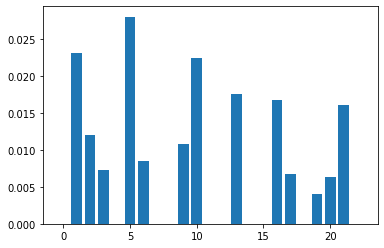

In [23]:
#Feature selection for numerical features

def select_features(x_train, y_train, x_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(x_train, y_train)
    x_train_fs = fs.transform(x_train)
    x_test_fs = fs.transform(x_test)
    return x_train_fs, x_test_fs, fs
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)
for i in range(len(fs.scores_)):
     print('Feature %d: %f' % (i, fs.scores_[i]))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()




In [24]:
#Feature selection for categorical features
task_category = task_category.select_dtypes("object")
task_category.head()

,Gender,MaritalStatus,Turnover,Travelling,Vertical,EducationField,Role,OverTime
0,M,Divorced,No,Sometimes,Research & Development,Medical,Laboratory Technician,No
1,M,Single,No,Mostly,Sales,Life Sciences,Sales Representative,No
2,M,Single,Yes,Sometimes,Human Resources,Life Sciences,Manager,No
3,M,Divorced,No,Sometimes,Research & Development,Medical,Manufacturing Director,No
4,M,Single,Yes,Sometimes,Sales,Technical Degree,Sales Representative,No


In [25]:
task_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          1470 non-null   object
 1   MaritalStatus   1470 non-null   object
 2   Turnover        1470 non-null   object
 3   Travelling      1470 non-null   object
 4   Vertical        1470 non-null   object
 5   EducationField  1470 non-null   object
 6   Role            1470 non-null   object
 7   OverTime        1470 non-null   object
dtypes: object(8)
memory usage: 92.0+ KB


In [26]:
task_category.columns

Index(['Gender', 'MaritalStatus', 'Turnover', 'Travelling', 'Vertical',
       'EducationField', 'Role', 'OverTime'],
      dtype='object')

In [27]:
change_index_column=['Gender', 'MaritalStatus', 'Travelling', 'Vertical',
       'EducationField', 'Role', 'OverTime','Turnover']

In [28]:
task_category=task_category[change_index_column]

In [29]:
task_category.head()

,Gender,MaritalStatus,Travelling,Vertical,EducationField,Role,OverTime,Turnover
0,M,Divorced,Sometimes,Research & Development,Medical,Laboratory Technician,No,No
1,M,Single,Mostly,Sales,Life Sciences,Sales Representative,No,No
2,M,Single,Sometimes,Human Resources,Life Sciences,Manager,No,Yes
3,M,Divorced,Sometimes,Research & Development,Medical,Manufacturing Director,No,No
4,M,Single,Sometimes,Sales,Technical Degree,Sales Representative,No,Yes


In [30]:
col_1="Turnover"
a = task_category.loc[:, task_category.columns != col_1]
b= task_category.pop('Turnover')


In [31]:
a.head()

,Gender,MaritalStatus,Travelling,Vertical,EducationField,Role,OverTime
0,M,Divorced,Sometimes,Research & Development,Medical,Laboratory Technician,No
1,M,Single,Mostly,Sales,Life Sciences,Sales Representative,No
2,M,Single,Sometimes,Human Resources,Life Sciences,Manager,No
3,M,Divorced,Sometimes,Research & Development,Medical,Manufacturing Director,No
4,M,Single,Sometimes,Sales,Technical Degree,Sales Representative,No


In [32]:
b.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Turnover, dtype: object

In [33]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.33, random_state=1)

In [34]:
print('Train', a_train.shape, b_train.shape)
print('Test', a_test.shape, b_test.shape)

Train (984, 7) (984,)
Test (486, 7) (486,)


In [35]:
a= a.astype(str)

In [36]:
#Convert character features to numeric using skit learn preprocessing methods
# prepare input data
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
def prepare_inputs(a_train,a_test):
    oe = OrdinalEncoder()
    oe.fit(a_train)
    a_train_enc = oe.transform(a_train)
    a_test_enc = oe.transform(a_test)
    return a_train_enc, a_test_enc

def prepare_targets(b_train, b_test):
    le = LabelEncoder()
    le.fit(b_train)
    b_train_enc = le.transform(b_train)
    b_test_enc = le.transform(b_test)
    return b_train_enc, b_test_enc


     

In [37]:
def select_features(a_train, b_train, a_test):
    ds = SelectKBest(score_func=mutual_info_classif, k='all')
    ds.fit(a_train, b_train)
    a_train_ds = ds.transform(a_train)
    a_test_ds = ds.transform(a_test)
    return a_train_ds, a_test_ds, ds
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.33, random_state=1)
a_train_enc, a_test_enc = prepare_inputs(a_train, a_test)
b_train_enc, b_test_enc = prepare_targets(b_train, b_test)
a_train_ds, a_test_ds, ds = select_features(a_train_enc, b_train_enc, a_test_enc)
for i in range(len(ds.scores_)):
    print('Feature %d: %f' % (i, ds.scores_[i]))



Feature 0: 0.000000
Feature 1: 0.016757
Feature 2: 0.000000
Feature 3: 0.000000
Feature 4: 0.000000
Feature 5: 0.011504
Feature 6: 0.012494


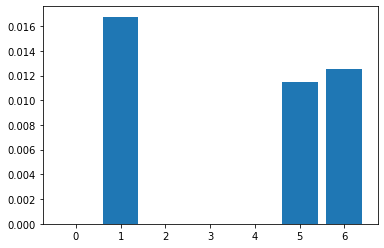

In [38]:
plt.bar([i for i in range(len(ds.scores_))], ds.scores_)
plt.show()
  

In [41]:
#Removing features with zero variance, make use of visualization.

task_0=ideaspacedf.copy()

In [42]:
task_0

,EmployeId,Age,Gender,MaritalStatus,Turnover,Travelling,Vertical,Qualifications,EducationField,EmployeSatisfaction,...,RelationshipSatisfaction,Hours,StockOptionLevel,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
0,63,29,M,Divorced,No,Sometimes,Research & Development,1,Medical,3,...,4,80,1,2,3,3,2,2,2,2
1,723,23,M,Single,No,Mostly,Sales,1,Life Sciences,2,...,4,80,0,3,3,1,0,0,0,6
2,1297,36,M,Single,Yes,Sometimes,Human Resources,4,Life Sciences,2,...,3,80,0,3,4,7,7,0,0,10
3,51,30,M,Divorced,No,Sometimes,Research & Development,4,Medical,3,...,2,80,3,5,3,10,6,3,9,12
4,1498,29,M,Single,Yes,Sometimes,Sales,3,Technical Degree,4,...,1,80,0,2,3,3,2,2,2,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,702,49,M,Divorced,No,Sometimes,Research & Development,3,Medical,4,...,3,80,2,3,3,7,7,4,6,24
1466,1999,30,F,Married,No,Mostly,Research & Development,3,Life Sciences,4,...,3,80,0,3,3,3,2,1,2,2
1467,1395,21,M,Single,No,Mostly,Research & Development,1,Medical,4,...,3,80,0,5,3,1,4,0,0,2
1468,919,42,M,Married,No,Sometimes,Sales,3,Marketing,4,...,3,80,1,3,2,1,0,0,0,10


In [43]:
task_0['Turnover'].replace(['Yes', 'No'],[1, 0], inplace=True)

In [44]:
task_0.head()

,EmployeId,Age,Gender,MaritalStatus,Turnover,Travelling,Vertical,Qualifications,EducationField,EmployeSatisfaction,...,RelationshipSatisfaction,Hours,StockOptionLevel,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
0,63,29,M,Divorced,0,Sometimes,Research & Development,1,Medical,3,...,4,80,1,2,3,3,2,2,2,2
1,723,23,M,Single,0,Mostly,Sales,1,Life Sciences,2,...,4,80,0,3,3,1,0,0,0,6
2,1297,36,M,Single,1,Sometimes,Human Resources,4,Life Sciences,2,...,3,80,0,3,4,7,7,0,0,10
3,51,30,M,Divorced,0,Sometimes,Research & Development,4,Medical,3,...,2,80,3,5,3,10,6,3,9,12
4,1498,29,M,Single,1,Sometimes,Sales,3,Technical Degree,4,...,1,80,0,2,3,3,2,2,2,24


In [45]:
task_0.columns

Index(['EmployeId', 'Age', 'Gender', 'MaritalStatus', 'Turnover', 'Travelling',
       'Vertical', 'Qualifications', 'EducationField', 'EmployeSatisfaction',
       'JobEngagement', 'JobLevel', 'JobSatisfaction', 'Role', 'DailyBilling',
       'HourBilling', 'MonthlyBilling', 'MonthlyRate', 'Work Experience',
       'OverTime', 'PercentSalaryHike', 'Last Rating',
       'RelationshipSatisfaction', 'Hours', 'StockOptionLevel',
       'TrainingTimesLastYear', 'Work&Life', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrentManager', 'DistanceFromHome'],
      dtype='object')

In [48]:
c_index_columns=['EmployeId', 'Age', 'Gender', 'MaritalStatus', 'Travelling',
       'Vertical', 'Qualifications', 'EducationField', 'EmployeSatisfaction',
       'JobEngagement', 'JobLevel', 'JobSatisfaction', 'Role', 'DailyBilling',
       'HourBilling', 'MonthlyBilling', 'MonthlyRate', 'Work Experience',
       'OverTime', 'PercentSalaryHike', 'Last Rating',
       'RelationshipSatisfaction', 'Hours', 'StockOptionLevel',
       'TrainingTimesLastYear', 'Work&Life', 'YearsAtCompany',
       'YearsSinceLastPromotion',
       'YearsWithCurrentManager', 'DistanceFromHome','Turnover']

In [49]:
task_0=task_0[c_index_columns]

In [50]:
task_0

,EmployeId,Age,Gender,MaritalStatus,Travelling,Vertical,Qualifications,EducationField,EmployeSatisfaction,JobEngagement,...,RelationshipSatisfaction,Hours,StockOptionLevel,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome,Turnover
0,63,29,M,Divorced,Sometimes,Research & Development,1,Medical,3,3,...,4,80,1,2,3,3,2,2,2,0
1,723,23,M,Single,Mostly,Sales,1,Life Sciences,2,3,...,4,80,0,3,3,1,0,0,6,0
2,1297,36,M,Single,Sometimes,Human Resources,4,Life Sciences,2,3,...,3,80,0,3,4,7,0,0,10,1
3,51,30,M,Divorced,Sometimes,Research & Development,4,Medical,3,3,...,2,80,3,5,3,10,3,9,12,0
4,1498,29,M,Single,Sometimes,Sales,3,Technical Degree,4,3,...,1,80,0,2,3,3,2,2,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,702,49,M,Divorced,Sometimes,Research & Development,3,Medical,4,3,...,3,80,2,3,3,7,4,6,24,0
1466,1999,30,F,Married,Mostly,Research & Development,3,Life Sciences,4,2,...,3,80,0,3,3,3,1,2,2,0
1467,1395,21,M,Single,Mostly,Research & Development,1,Medical,4,2,...,3,80,0,5,3,1,0,0,2,0
1468,919,42,M,Married,Sometimes,Sales,3,Marketing,4,3,...,3,80,1,3,2,1,0,0,10,0


In [51]:
task_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeId                 1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Gender                    1470 non-null   object
 3   MaritalStatus             1470 non-null   object
 4   Travelling                1470 non-null   object
 5   Vertical                  1470 non-null   object
 6   Qualifications            1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeSatisfaction       1470 non-null   int64 
 9   JobEngagement             1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobSatisfaction           1470 non-null   int64 
 12  Role                      1470 non-null   object
 13  DailyBilling              1470 non-null   int64 
 14  HourBilling             

In [52]:
#dropping categorical columns from dataset using label encoder
from sklearn import preprocessing
l_e= preprocessing.LabelEncoder()
task_0['Gender']= l_e.fit_transform(task_0['Gender'])
task_0['MaritalStatus']= l_e.fit_transform(task_0['MaritalStatus'])
task_0['Travelling']= l_e.fit_transform(task_0['Travelling'])
task_0['Vertical']= l_e.fit_transform(task_0['Vertical'])
task_0['EducationField']= l_e.fit_transform(task_0['EducationField'])
task_0['Role']= l_e.fit_transform(task_0['Role'])
task_0['OverTime']= l_e.fit_transform(task_0['OverTime'])


<ipython-input-52-402165d46561>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task_0['Gender']= l_e.fit_transform(task_0['Gender'])
<ipython-input-52-402165d46561>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task_0['MaritalStatus']= l_e.fit_transform(task_0['MaritalStatus'])
<ipython-input-52-402165d46561>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [53]:
task_0.head()

,EmployeId,Age,Gender,MaritalStatus,Travelling,Vertical,Qualifications,EducationField,EmployeSatisfaction,JobEngagement,...,RelationshipSatisfaction,Hours,StockOptionLevel,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome,Turnover
0,63,29,1,0,2,1,1,3,3,3,...,4,80,1,2,3,3,2,2,2,0
1,723,23,1,2,0,2,1,1,2,3,...,4,80,0,3,3,1,0,0,6,0
2,1297,36,1,2,2,0,4,1,2,3,...,3,80,0,3,4,7,0,0,10,1
3,51,30,1,0,2,1,4,3,3,3,...,2,80,3,5,3,10,3,9,12,0
4,1498,29,1,2,2,2,3,5,4,3,...,1,80,0,2,3,3,2,2,24,1


In [54]:
#zero variance threshold for constant value
from sklearn.feature_selection import VarianceThreshold

In [55]:
task_0.shape

(1470, 31)

In [56]:
U=task_0.drop(labels=['Turnover'],axis=1)
V=task_0['Turnover']

In [57]:
U.head()

,EmployeId,Age,Gender,MaritalStatus,Travelling,Vertical,Qualifications,EducationField,EmployeSatisfaction,JobEngagement,...,Last Rating,RelationshipSatisfaction,Hours,StockOptionLevel,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
0,63,29,1,0,2,1,1,3,3,3,...,4,4,80,1,2,3,3,2,2,2
1,723,23,1,2,0,2,1,1,2,3,...,3,4,80,0,3,3,1,0,0,6
2,1297,36,1,2,2,0,4,1,2,3,...,3,3,80,0,3,4,7,0,0,10
3,51,30,1,0,2,1,4,3,3,3,...,3,2,80,3,5,3,10,3,9,12
4,1498,29,1,2,2,2,3,5,4,3,...,3,1,80,0,2,3,3,2,2,24


In [58]:
V.head()

0    0
1    0
2    1
3    0
4    1
Name: Turnover, dtype: int64

In [59]:
U_train, U_test, V_train, V_test = train_test_split(task_0.drop(labels=['Turnover'],axis=1),task_0['Turnover'], test_size=0.3, random_state=0)

In [60]:
U_train.shape,U_test.shape

((1029, 30), (441, 30))

In [61]:
V_train.shape,V_test.shape

((1029,), (441,))

In [62]:
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(U_train)

VarianceThreshold(threshold=0)

In [63]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True])